# EDA

In [1]:
#!pip install basemap > None

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from mpl_toolkits.basemap import Basemap
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

%matplotlib inline

## Data intro
20 непрерывных категориальных параметров 513 месторождений нефти.

In [3]:
path = 'dataset_geologist.xlsx'
data = pd.read_excel(path, index_col='Unnamed: 0')

In [4]:
data.columns

Index(['N', '1. Field name', '2. Reservoir unit', '3. Country', '4. Region',
       '5. Basin name', '6. Tectonic regime', '7. Latitude', '8. Longitude',
       '9. Operator company', '10. Onshore or offshore',
       '11. Hydrocarbon type (main)', '12. Reservoir status (current)',
       '13. Structural setting', '14. Depth (top reservoir ft TVD)',
       '15. Reservoir period', '16. Lithology (main)',
       '17. Thickness (gross average ft)',
       '18. Thickness (net pay average ft)', '19. Porosity (matrix average %)',
       '20. Permeability (air average mD)'],
      dtype='object')

In [5]:
new_col_names = ['_'.join(s.split()[1:]) for s in data.columns]
new_col_names[0] = 'num'
data.columns = new_col_names
data.columns

Index(['num', 'Field_name', 'Reservoir_unit', 'Country', 'Region',
       'Basin_name', 'Tectonic_regime', 'Latitude', 'Longitude',
       'Operator_company', 'Onshore_or_offshore', 'Hydrocarbon_type_(main)',
       'Reservoir_status_(current)', 'Structural_setting',
       'Depth_(top_reservoir_ft_TVD)', 'Reservoir_period', 'Lithology_(main)',
       'Thickness_(gross_average_ft)', 'Thickness_(net_pay_average_ft)',
       'Porosity_(matrix_average_%)', 'Permeability_(air_average_mD)'],
      dtype='object')

In [6]:
data.shape

(514, 21)

In [7]:
data.dtypes

num                                 int64
Field_name                         object
Reservoir_unit                     object
Country                            object
Region                             object
Basin_name                         object
Tectonic_regime                    object
Latitude                          float64
Longitude                         float64
Operator_company                   object
Onshore_or_offshore                object
Hydrocarbon_type_(main)            object
Reservoir_status_(current)         object
Structural_setting                 object
Depth_(top_reservoir_ft_TVD)        int64
Reservoir_period                   object
Lithology_(main)                   object
Thickness_(gross_average_ft)      float64
Thickness_(net_pay_average_ft)    float64
Porosity_(matrix_average_%)       float64
Permeability_(air_average_mD)     float64
dtype: object

In [8]:
data.isna().sum()

num                                0
Field_name                         0
Reservoir_unit                     0
Country                            0
Region                             0
Basin_name                         0
Tectonic_regime                   72
Latitude                           0
Longitude                          0
Operator_company                   0
Onshore_or_offshore                0
Hydrocarbon_type_(main)            0
Reservoir_status_(current)         0
Structural_setting                 0
Depth_(top_reservoir_ft_TVD)       0
Reservoir_period                   0
Lithology_(main)                   0
Thickness_(gross_average_ft)       0
Thickness_(net_pay_average_ft)     0
Porosity_(matrix_average_%)       72
Permeability_(air_average_mD)      0
dtype: int64

In [9]:
df = data.copy().dropna()

In [10]:
df.drop('num', inplace=True, axis=1)

**Targets: Tectonic_regime, Porosity_(matrix_average_%)**.

### Numerical columns

In [11]:
num_cols = df.select_dtypes(exclude='object')
num_cols.shape

(442, 7)

In [12]:
num_cols.describe()

,Latitude,Longitude,Depth_(top_reservoir_ft_TVD),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,35.078113,-8.349127,6613.658371,784.540724,189.061946,17.929955,469.916425
std,21.861937,87.891701,3572.468358,1442.899648,282.161279,7.554253,1017.081304
min,-38.398900,-151.615300,220.000000,11.000000,0.000000,1.100000,0.010000
25%,28.124825,-102.403650,3824.500000,135.750000,43.000000,12.000000,10.000000
50%,37.642350,2.247700,6137.500000,328.000000,100.000000,17.900000,79.500000
75%,51.285650,57.562525,9071.500000,748.750000,206.500000,24.000000,400.000000
max,76.446200,148.417000,19888.000000,12500.000000,2976.000000,55.000000,7500.000000


### Geospatial data visualization

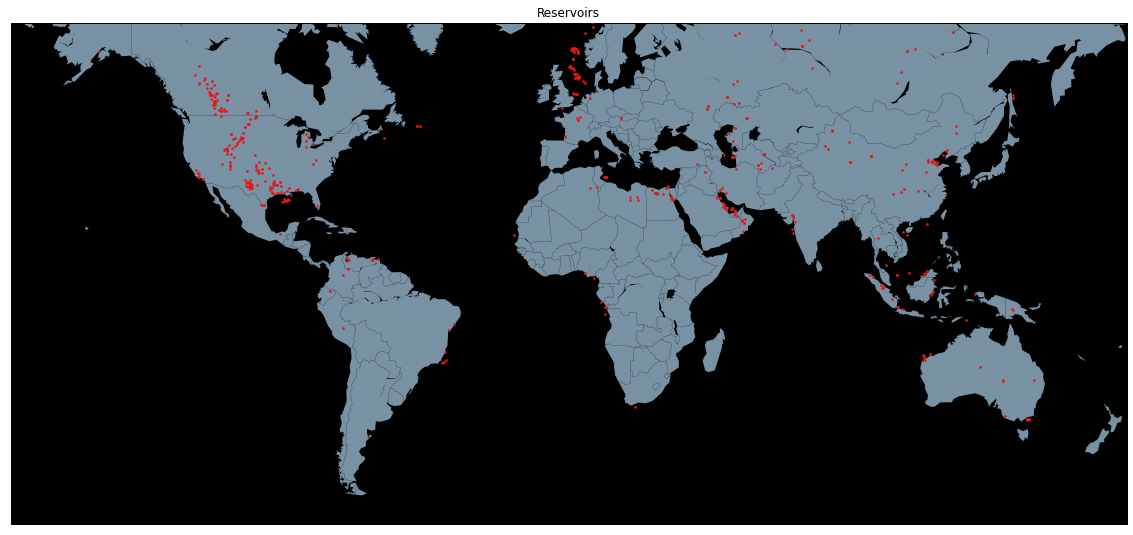

In [13]:
plt.figure(1, figsize=(20,12))

# Mercator of World
m1 = Basemap(
    projection='merc',
    llcrnrlat=-60,
    urcrnrlat=65,
    llcrnrlon=-180,
    urcrnrlon=180,
    lat_ts=0,
    resolution='c',
)

m1.fillcontinents(color='#7892A4',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.2, color="#000000")        # thin white line for country borders

# Plot the data
mxy = m1(data["Longitude"].tolist(), data["Latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=7, c="#E6171A", lw=0, alpha=1, zorder=5)

plt.title("Reservoirs")
plt.show()

### Categorical columns

In [14]:
cat_cols = df.select_dtypes(include='object')
cat_cols.shape

(442, 13)

In [15]:
cat_cols.head()

,Field_name,Reservoir_unit,Country,Region,Basin_name,Tectonic_regime,Operator_company,Onshore_or_offshore,Hydrocarbon_type_(main),Reservoir_status_(current),Structural_setting,Reservoir_period,Lithology_(main)
0,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,JURASSIC,LIMESTONE
1,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,GUPCO,ONSHORE,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,CRETACEOUS,SANDSTONE
2,ABU MADI-EL QARA,ABU MADI (LEVEL II),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,IEOC,ONSHORE,GAS,DECLINING PRODUCTION,WRENCH,NEOGENE,THINLY-BEDDED SANDSTONE
3,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,IEOC,ONSHORE,GAS,DECLINING PRODUCTION,WRENCH,NEOGENE,SANDSTONE
4,AL HUWAISAH,SHUAIBA,OMAN,MIDDLE EAST,FAHUD SALT,COMPRESSION,PDO,ONSHORE,OIL,REJUVENATING,SALT,CRETACEOUS,LIMESTONE


In [16]:
cat_cols.describe()

,Field_name,Reservoir_unit,Country,Region,Basin_name,Tectonic_regime,Operator_company,Onshore_or_offshore,Hydrocarbon_type_(main),Reservoir_status_(current),Structural_setting,Reservoir_period,Lithology_(main)
count,442,442,442,442,442,442,442,442,442,442,442,442,442
unique,388,353,49,7,116,9,180,3,6,13,12,15,17
top,LAOJUNMIAO,BRENT,USA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,NUMEROUS,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,CRETACEOUS,SANDSTONE
freq,3,9,120,171,40,214,39,307,332,131,122,122,248


### Label encoding

In [17]:
le = LabelEncoder()
for c in cat_cols.columns:
    df[c] = le.fit_transform(cat_cols[c])
df.head()  

,Field_name,Reservoir_unit,Country,Region,Basin_name,Tectonic_regime,Latitude,Longitude,Operator_company,Onshore_or_offshore,Hydrocarbon_type_(main),Reservoir_status_(current),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
0,0,22,35,5,99,0,26.0800,49.8100,138,1,5,8,2,6050,5,9,250.0,184.0,21.0,410.0
1,1,28,12,0,0,2,29.7422,28.4925,61,1,3,5,6,10282,3,11,745.0,144.0,10.0,8.0
2,2,4,12,0,59,5,31.4382,31.3616,68,1,2,2,11,9843,7,15,115.0,66.0,22.0,200.0
3,2,5,12,0,59,5,31.4382,31.3616,68,1,2,2,11,10499,7,11,509.0,410.0,20.0,300.0
4,3,261,30,5,27,0,21.9607,56.0452,109,1,5,8,7,4955,3,9,250.0,100.0,21.0,60.0


In [18]:
df_class = df['Tectonic_regime']

### Scatterplots with targets

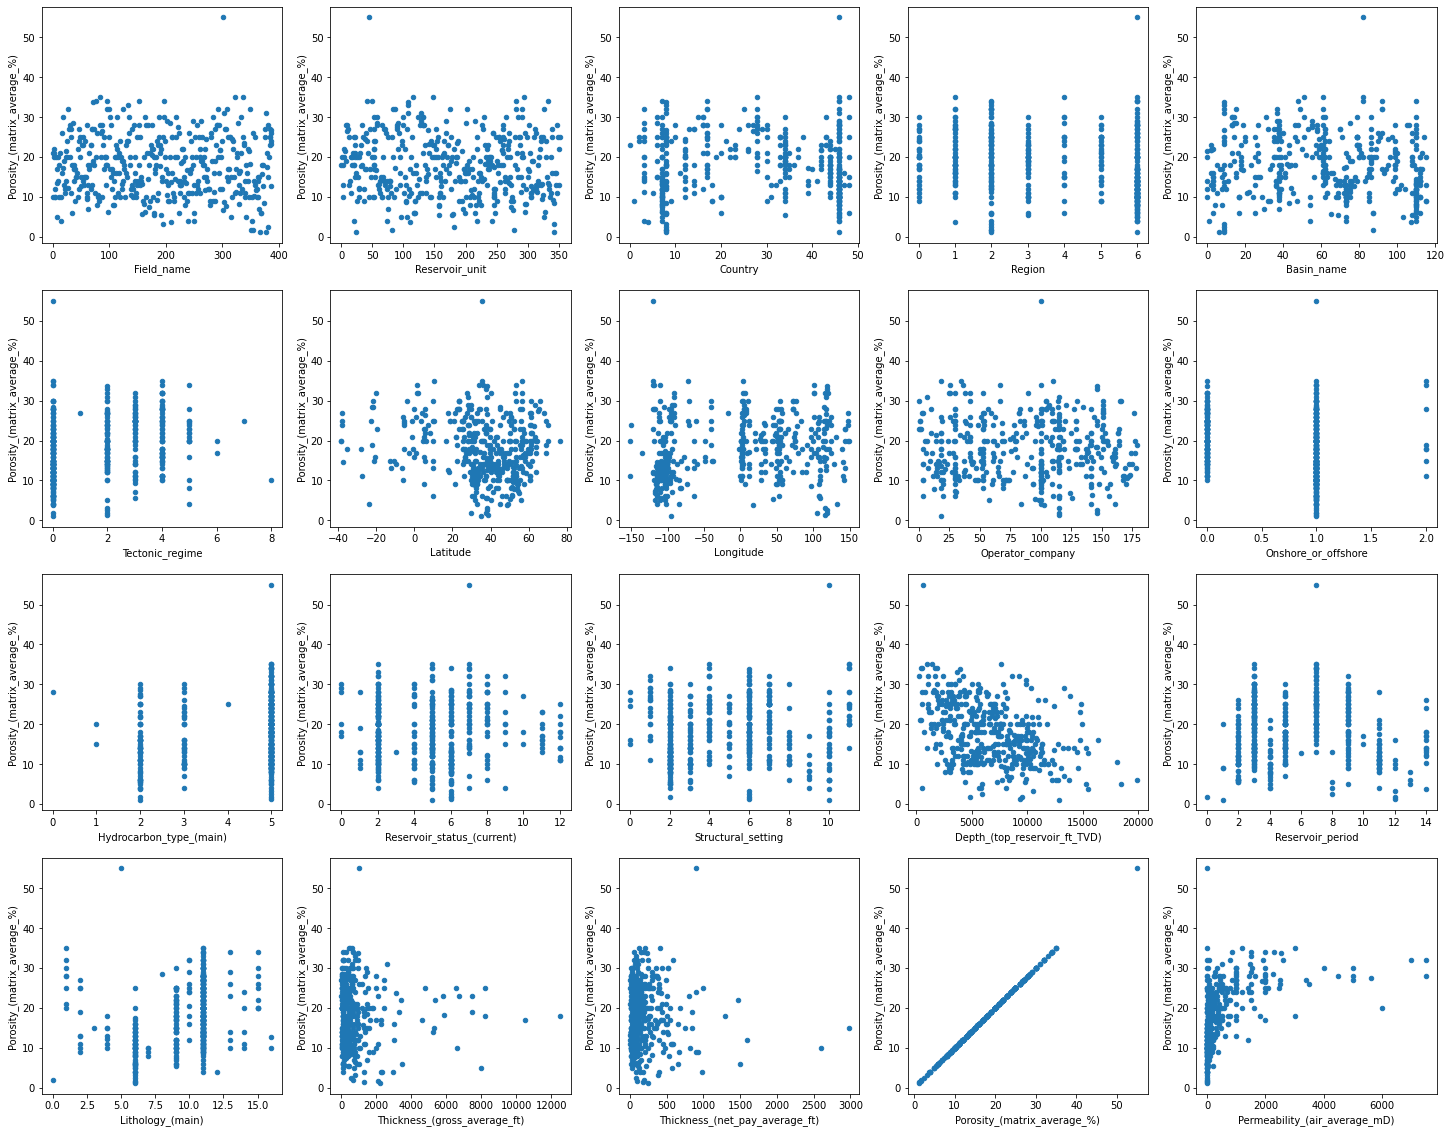

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(25, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "Porosity_(matrix_average_%)", subplots=True, kind="scatter", ax=axes[idx // 5, idx % 5])

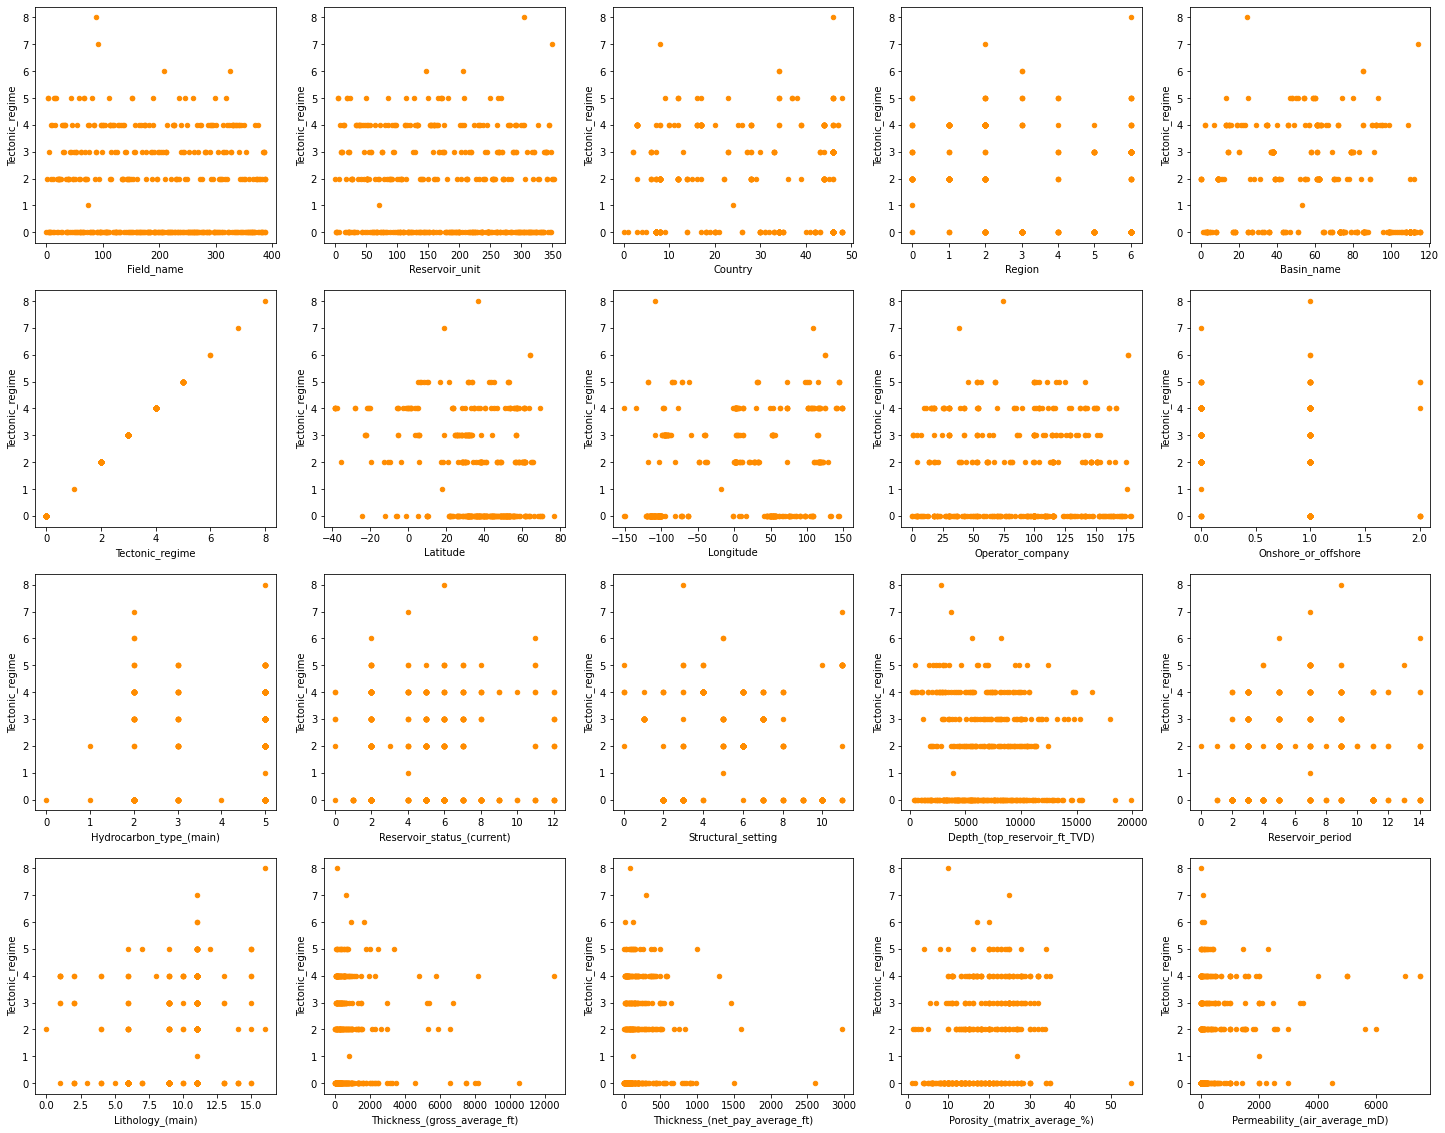

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(25, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "Tectonic_regime", subplots=True, kind="scatter", ax=axes[idx // 5, idx % 5], color='darkorange')

### Outliers

In [21]:
num_cols.columns[2:]

Index(['Depth_(top_reservoir_ft_TVD)', 'Thickness_(gross_average_ft)',
       'Thickness_(net_pay_average_ft)', 'Porosity_(matrix_average_%)',
       'Permeability_(air_average_mD)'],
      dtype='object')

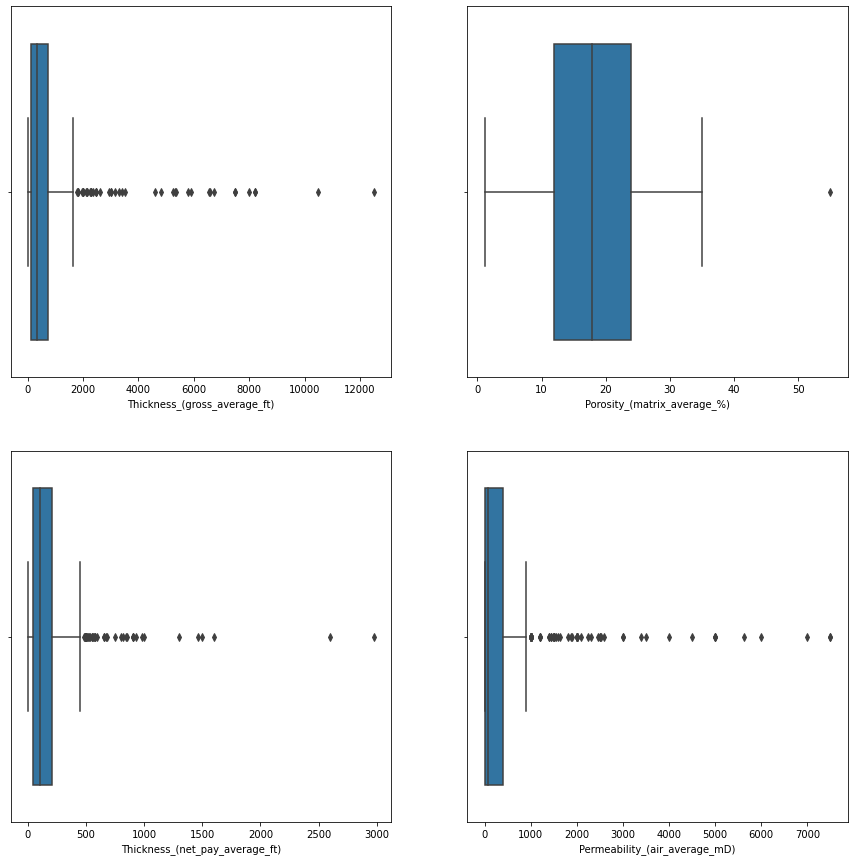

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
count = 0
for idx, feature in enumerate(num_cols.columns[3:]):
    sns.boxplot(x=df[feature], ax=axes[count %2, count // 2])
    count += 1

In [25]:
for col in num_cols.columns[3:]:    
    print(f'Outliers for {col} column: {boxplot_stats(df[col]).pop(0)["fliers"]}\n')

Outliers for Thickness_(gross_average_ft) column: [ 8000.  2100.  3000.  3400.  8200.  2000.  4600.  7500. 10500.  8200.
  2000.  1800.  3281.  2300.  7500. 12500.  6600.  5800.  5350.  3500.
  2133.  2953.  2460.  5335.  2300.  2460.  2300.  2000.  3000.  1800.
  6739.  1772.  1970.  3150.  5249.  5900.  2350.  2133.  6562.  2250.
  4800.  2460.  2615.]

Outliers for Thickness_(net_pay_average_ft) column: [ 575.  512.  816.  500.  840.  570.  500.  672.  650.  550.  580.  590.
  850.  490.  480.  800.  900.  525. 1300.  679. 2600. 1466. 1500.  928.
  984. 2976.  563.  650. 1000.  750. 1600.  902.  520.  500.  900.  490.
  535.  550.  490.  500.]

Outliers for Porosity_(matrix_average_%) column: [55.]

Outliers for Permeability_(air_average_mD) column: [3000. 5000. 5000. 1000. 2250. 1500. 1000. 1450. 1000. 1000. 1000. 2529.
 2000. 2500. 3000. 1500. 2000. 2000. 6000. 1500. 1900. 2098. 1550. 1200.
 1000. 1000. 1500. 1000. 1000. 1600. 3400. 1450. 1400. 2300. 4000. 4500.
 5000. 2000. 2000.

### Distribution of numeric features

<AxesSubplot:xlabel='Permeability_(air_average_mD)', ylabel='Density'>

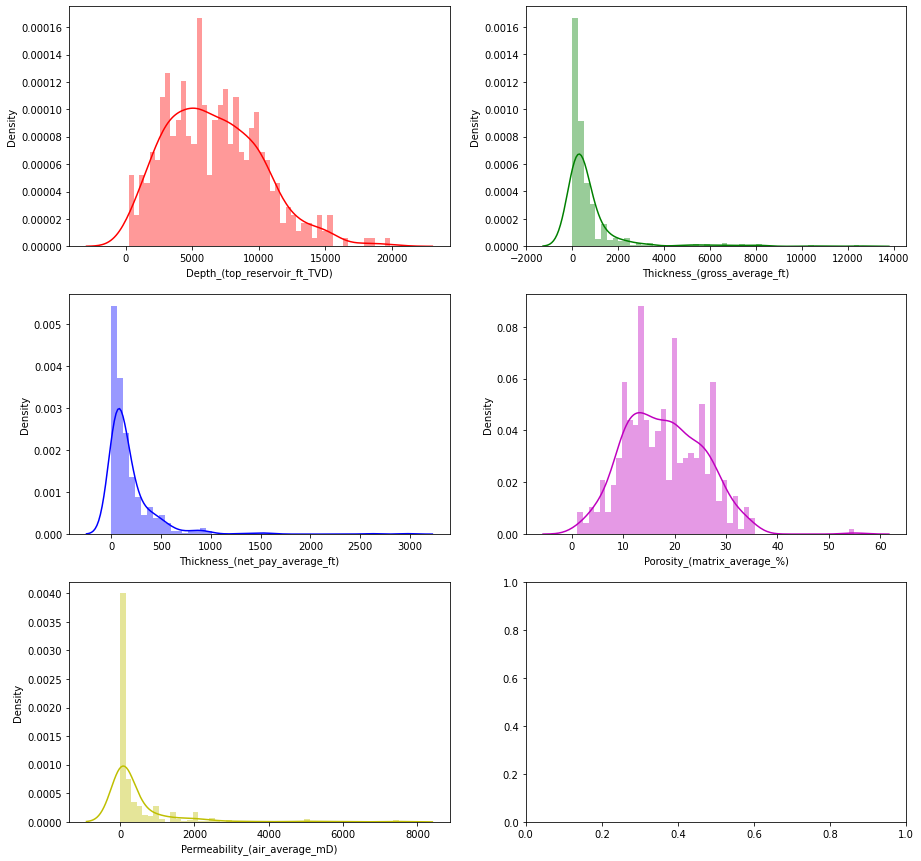

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.distplot(df['Depth_(top_reservoir_ft_TVD)'], bins=50, color='r', ax=axes[0, 0])
sns.distplot(df['Thickness_(gross_average_ft)'], bins=50, color='g', ax=axes[0, 1])
sns.distplot(df['Thickness_(net_pay_average_ft)'], bins=50, color='b', ax=axes[1, 0])
sns.distplot(df['Porosity_(matrix_average_%)'].dropna(), bins=50, color='m', ax=axes[1, 1])
sns.distplot(df['Permeability_(air_average_mD)'], bins=50, color='y', ax=axes[2, 0])

### Strange porosity case

In [27]:
data[data['Porosity_(matrix_average_%)'] > 50]

,num,Field_name,Reservoir_unit,Country,Region,Basin_name,Tectonic_regime,Latitude,Longitude,Operator_company,...,Hydrocarbon_type_(main),Reservoir_status_(current),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
401,861,SOUTH BELRIDGE,BELRIDGE DIATOMITE (MONTEREY-ETCHEGOIN),USA,NORTH AMERICA,SAN JOAQUIN,COMPRESSION,35.4368,-119.6788,NUMEROUS,...,OIL,PLATEAU PRODUCTION,THRUST,600,NEOGENE,DIATOMITE,1000.0,900.0,55.0,1.5


### Correlation matrix

<AxesSubplot:>

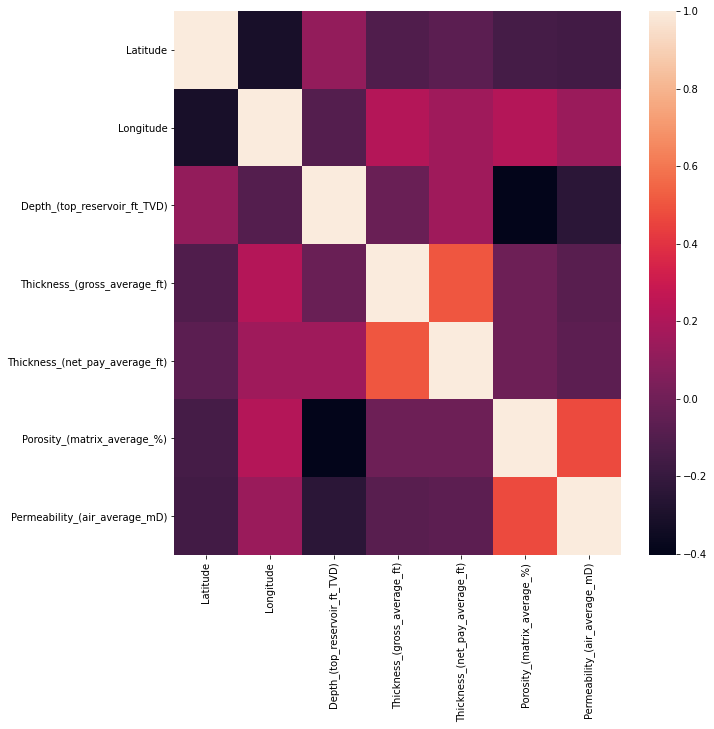

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(num_cols.corr())

### PCA (n_components=3)

In [29]:
num_cols.head()

,Latitude,Longitude,Depth_(top_reservoir_ft_TVD),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
0,26.0800,49.8100,6050,250.0,184.0,21.0,410.0
1,29.7422,28.4925,10282,745.0,144.0,10.0,8.0
2,31.4382,31.3616,9843,115.0,66.0,22.0,200.0
3,31.4382,31.3616,10499,509.0,410.0,20.0,300.0
4,21.9607,56.0452,4955,250.0,100.0,21.0,60.0


In [31]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(num_cols)
df_scaled[:5]

array([[-0.41205449,  0.66246334, -0.15795719, -0.37088264, -0.01796023,
         0.40686009, -0.05897692],
       [-0.24434978,  0.4196457 ,  1.02800026, -0.02743471, -0.15988376,
        -1.05092331, -0.45467343],
       [-0.16668412,  0.45232627,  0.90497679, -0.46455026, -0.43663466,
         0.53938586, -0.26568405],
       [-0.16668412,  0.45232627,  1.0888114 , -0.19117958,  0.78390774,
         0.27433433, -0.16725208],
       [-0.60069138,  0.73348558, -0.46481528, -0.37088264, -0.31599965,
         0.40686009, -0.40348881]])

In [32]:
df_scaled.shape

(442, 7)

In [33]:
model = PCA(n_components=3)
model.fit(df_scaled)
df_pca3 = model.transform(df_scaled)

In [36]:
def draw_3d_data(data):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    for f in data:
        ax.scatter(f[0], f[1], f[2], c='b')
    plt.show()

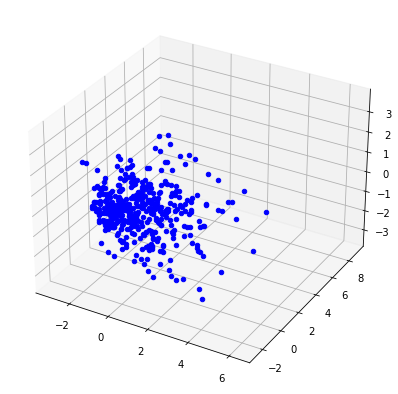

In [37]:
draw_3d_data(df_pca3)

### Class visualizations with PCA

In [38]:
model = PCA(n_components=2)
model.fit(df_scaled)
pca_coords = model.transform(df_scaled)
pca_coords[:5]

array([[ 0.62254731, -0.04291578],
       [-0.99525463,  0.53037587],
       [-0.04849637, -0.2217363 ],
       [-0.14946202,  0.7595916 ],
       [ 0.67157496, -0.16222469]])

In [39]:
df_to_draw = pd.DataFrame({
    'class': df_class,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
})
colors = ['b', 'r', 'k', 'g', 'c', 'm', 'y', 'gold', 'darkorange', 'lime']

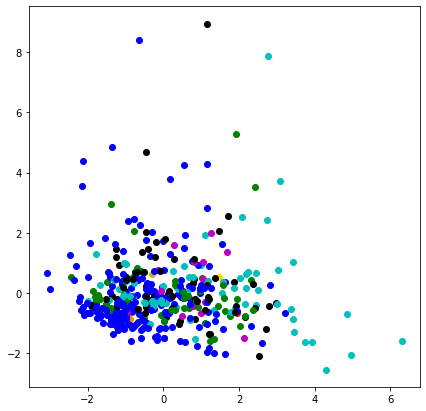

In [41]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

for f in df_to_draw.iterrows():
    ax.scatter(f[1]['pca1'], f[1]['pca2'], c=colors[int(f[1]['class'])])
    
plt.show()

In [42]:
model = PCA(n_components=3)
model.fit(df_scaled)
pca_coords = model.transform(df_scaled)
pca_coords[:5]

array([[ 0.62254731, -0.04291578,  0.51594456],
       [-0.99525463,  0.53037587,  1.05948562],
       [-0.04849637, -0.2217363 ,  0.73288092],
       [-0.14946202,  0.7595916 ,  0.37956724],
       [ 0.67157496, -0.16222469,  0.72337851]])

In [43]:
df_to_draw = pd.DataFrame({
    'class': df_class,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
    'pca3': pca_coords[:, 2],
})
colors = ['b', 'r', 'k', 'g', 'c', 'm', 'y', 'gold', 'darkorange', 'lime']

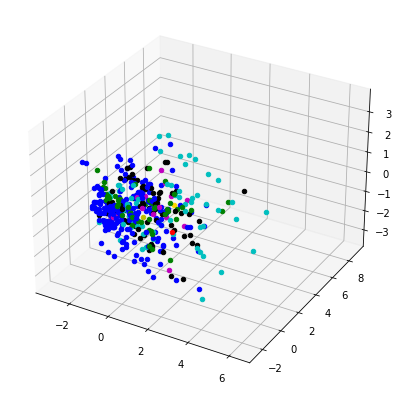

In [44]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

for f in df_to_draw.iterrows():
    ax.scatter(f[1]['pca1'], f[1]['pca2'], f[1]['pca3'], c=colors[int(f[1]['class'])])
plt.show()